In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
solution_df = pd.read_csv('solution.csv')

In [5]:
num_genres = train_df['GENRE'].nunique()
print(f'Total number of unique genres: {num_genres}')

Total number of unique genres: 27


In [6]:
genre_counts = train_df['GENRE'].value_counts()
print("Genres and their counts:")
print(genre_counts)

Genres and their counts:
GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


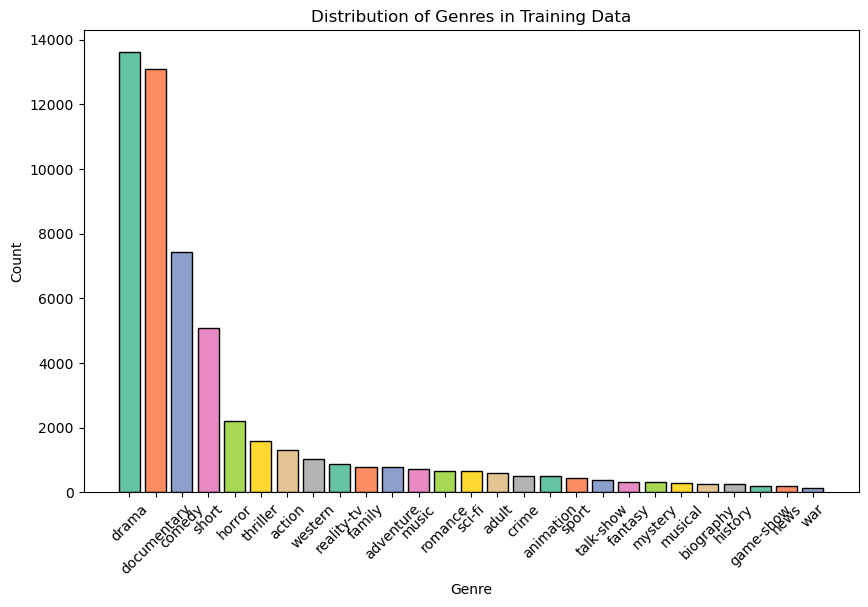

In [7]:
# Use seaborn color palette
palette = sns.color_palette('Set2', n_colors=len(genre_counts))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color=palette, edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres in Training Data')
plt.xticks(rotation=45)  # Rotate genre names for better readability
plt.show()

In [8]:
import re
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize (split by whitespace)
        text = ' '.join(text.split())
    return text

In [9]:
'''train_df['DESCRIPTION'] = train_df['DESCRIPTION'].apply(preprocess_text)
test_df['DESCRIPTION'] = test_df['DESCRIPTION'].apply(preprocess_text)
solution_df['DESCRIPTION'] = solution_df['DESCRIPTION'].apply(preprocess_text)'''

"train_df['DESCRIPTION'] = train_df['DESCRIPTION'].apply(preprocess_text)\ntest_df['DESCRIPTION'] = test_df['DESCRIPTION'].apply(preprocess_text)\nsolution_df['DESCRIPTION'] = solution_df['DESCRIPTION'].apply(preprocess_text)"

In [10]:
min_length = 50  
keywords = ['drama','documentary','comedy','short','horror','thriller','action','western','reality-tv','family','adventure','music','romance','sci-fi','adult','crime','animation','sport','talk-show','fantasy','mystery','musical','biography','history','game-show',        
'news','war' ]

In [11]:
def filter_descriptions(df):
    # Remove empty or null descriptions
    df = df[df['DESCRIPTION'].notnull() & (df['DESCRIPTION'].str.strip() != '')]
    # Filter based on length
    df = df[df['DESCRIPTION'].str.len() >= min_length]
    # Filter based on keywords
    keyword_pattern = '|'.join(keywords)
    df = df[df['DESCRIPTION'].str.contains(keyword_pattern, case=False, na=False)]
    return df

In [12]:
'''# Apply filtering
train_df = filter_descriptions(train_df)
test_df = filter_descriptions(test_df)
solution_df = filter_descriptions(solution_df)'''

'# Apply filtering\ntrain_df = filter_descriptions(train_df)\ntest_df = filter_descriptions(test_df)\nsolution_df = filter_descriptions(solution_df)'

In [13]:
# Print the shape of the dataframes to check the preprocessing
print(f"Training data shape after preprocessing: {train_df.shape}")
print(f"Testing data shape after preprocessing: {test_df.shape}")
print(f"Solution data shape after preprocessing: {solution_df.shape}")

Training data shape after preprocessing: (54214, 4)
Testing data shape after preprocessing: (54200, 3)
Solution data shape after preprocessing: (54200, 4)


In [14]:
train_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [15]:
test_df.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [16]:
solution_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [17]:
'''# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
train_text_features = vectorizer.fit_transform(train_df['DESCRIPTION'])
test_text_features = vectorizer.transform(test_df['DESCRIPTION'])
solution_text_features = vectorizer.transform(solution_df['DESCRIPTION'])'''


"# Vectorization\nvectorizer = TfidfVectorizer(max_features=1000)\ntrain_text_features = vectorizer.fit_transform(train_df['DESCRIPTION'])\ntest_text_features = vectorizer.transform(test_df['DESCRIPTION'])\nsolution_text_features = vectorizer.transform(solution_df['DESCRIPTION'])"

In [18]:
train_df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [19]:
test_df.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [20]:
solution_df.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [22]:
train_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack, csr_matrix

# Define a function to preprocess the DataFrame
def preprocess_df(df):
    # Encode 'TITLE' and 'GENRE' columns
    le_title = LabelEncoder()
    le_genre = LabelEncoder()
    
    df['TITLE'] = le_title.fit_transform(df['TITLE'])
    df['GENRE'] = le_genre.fit_transform(df['GENRE'])
    
    # Convert 'DESCRIPTION' to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer()
    description_tfidf = tfidf_vectorizer.fit_transform(df['DESCRIPTION'])
    
    # Convert remaining features to a sparse matrix
    other_features = df[['ID', 'TITLE', 'GENRE']].astype(float)
    other_features_sparse = csr_matrix(other_features.values)
    
    # Combine all features
    combined_features = hstack([other_features_sparse, description_tfidf])
    
    return combined_features

# Apply preprocessing
train_sparse = preprocess_df(train_df)

solution_sparse = preprocess_df(solution_df)

# Convert sparse matrices to sparse DataFrames if needed
train_other_features = pd.DataFrame.sparse.from_spmatrix(train_sparse)
solution_other_features = pd.DataFrame.sparse.from_spmatrix(solution_sparse)

In [47]:

def preprocess_df1(df):
    # Encode 'TITLE' and 'GENRE' columns
    le_title = LabelEncoder()
    le_genre = LabelEncoder()
    
    df['TITLE'] = le_title.fit_transform(df['TITLE'])
    
    # Convert 'DESCRIPTION' to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer()
    description_tfidf = tfidf_vectorizer.fit_transform(df['DESCRIPTION'])
    
    other_features = df[['ID', 'TITLE']].astype(float)
    other_features_sparse = csr_matrix(other_features.values)
    combined_features = hstack([other_features_sparse, description_tfidf])
    
    return combined_features
test_sparse = preprocess_df1(test_df)
test_other_features = pd.DataFrame.sparse.from_spmatrix(test_sparse)

In [49]:
from scipy.sparse import csr_matrix
import pandas as pd
# Convert the DataFrames to sparse matrix format
train_sparse = csr_matrix(train_df.drop(columns=['DESCRIPTION']).values)
test_sparse = csr_matrix(test_df.drop(columns=['DESCRIPTION']).values)
solution_sparse = csr_matrix(solution_df.drop(columns=['DESCRIPTION']).values)

In [55]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
train_text_features = vectorizer.fit_transform(train_df['DESCRIPTION'])
test_text_features = vectorizer.transform(test_df['DESCRIPTION'])
solution_text_features = vectorizer.transform(solution_df['DESCRIPTION'])

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_solution = scaler.transform(X_solution)

In [57]:
X_train = hstack([train_other_features, train_text_features])
X_test = hstack([test_other_features, test_text_features])
X_solution = hstack([solution_other_features, solution_text_features])


MemoryError: Unable to allocate 48.9 GiB for an array with shape (121113, 54214) and data type float64

In [ ]:
# Print shapes of feature matrices
print(f"Shape of training features: {X_train.shape}")
print(f"Shape of test features: {X_test.shape}")
print(f"Shape of solution features: {X_solution.shape}")

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import re

# Download NLTK data (if not already done)
nltk.download('punkt')

# Tokenizer function using NLTK
def tokenize(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'\W+', '', token) for token in tokens if token.isalpha()]  # Remove non-alphanumeric tokens
    return tokens

In [ ]:

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        return text.lower()
    return str(text)

In [ ]:
print(train_df.columns)
print(test_df.columns)
print(solution_df.columns)

In [ ]:
# Apply preprocessing to relevant columns
for col in ['TITLE', 'GENRE', 'DESCRIPTION']:
    train_df[col] = train_df[col].apply(preprocess_text)
    solution_df[col] = solution_df[col].apply(preprocess_text)
    if col in test_df.columns:
        test_df[col] = test_df[col].apply(preprocess_text)

In [ ]:
all_data = pd.concat([train_df[['GENRE']], test_df[['TITLE']], solution_df[['GENRE']]], axis=0)
all_labels = all_data['GENRE'].unique()

# Label Encoding for categorical data
label_encoders = {}
for column in ['GENRE']:
    le = LabelEncoder()
    le.fit(all_labels)  # Fit on combined set of labels
    train_df[column] = le.transform(train_df[column])
    if column in test_df.columns:
        test_df[column] = le.transform(test_df[column])
    solution_df[column] = le.transform(solution_df[column])
    label_encoders[column] = le

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization with custom tokenizer
vectorizer = TfidfVectorizer(max_features=1000, tokenizer=tokenize)

# Vectorize the description columns
train_text_features = vectorizer.fit_transform(train_df['DESCRIPTION'])
test_text_features = vectorizer.transform(test_df['DESCRIPTION'])
solution_text_features = vectorizer.transform(solution_df['DESCRIPTION'])


In [ ]:
train_df.head()

In [ ]:
from scipy.sparse import csr_matrix
# Convert DataFrame features to sparse format
train_dense_features = csr_matrix(train_df.drop(columns=['DESCRIPTION']).values)
solution_dense_features = csr_matrix(solution_df.drop(columns=['DESCRIPTION']).values)
test_dense_features = csr_matrix(test_df.drop(columns=['DESCRIPTION']).values)

In [ ]:
from scipy.sparse import hstack
# Combine text features with other features (use sparse hstack)
X_train = hstack([train_df.drop(columns=['DESCRIPTION']).values, train_text_features])
X_solution = hstack([solution_df.drop(columns=['DESCRIPTION']).values, solution_text_features])

In [ ]:
# Vectorize and concatenate with the rest of the features
# Convert all entries in 'DESCRIPTION' to strings
train_df.loc[:, 'DESCRIPTION'] = train_df['DESCRIPTION'].astype(str)
test_df.loc[:, 'DESCRIPTION'] = test_df['DESCRIPTION'].astype(str)
solution_df.loc[:, 'DESCRIPTION'] = test_df['DESCRIPTION'].astype(str)
# Preprocess the descriptions in the train and test data
train_df.loc[:, 'DESCRIPTION'] = train_df['DESCRIPTION'].apply(preprocess_text)
test_df.loc[:, 'DESCRIPTION'] = test_df['DESCRIPTION'].apply(preprocess_text)
solution_df.loc[:, 'DESCRIPTION'] = test_df['DESCRIPTION'].apply(preprocess_text)
X_train = np.concatenate([train_df.drop(columns=['DESCRIPTION']).values, preprocess_text], axis=1)
X_solution = np.concatenate([solution_df.drop(columns=['DESCRIPTION']).values, preprocess_text], axis=1)

In [ ]:
X_test = np.concatenate([test_df.drop(columns=['DESCRIPTION']).values, test_text_features], axis=1)

In [ ]:
y_train = train_df['GENRE']
y_solution = solution_df['GENRE']

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_solution = scaler.transform(X_solution)

In [ ]:
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear')
}

In [ ]:

# Evaluate models using cross-validation on train data
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-validation accuracy: {np.mean(scores):.4f}')

# Fit models and make predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Test Accuracy: {accuracy_score(test_df['genre'], y_pred):.4f}')
    print(f'Classification Report for {name}:\n{classification_report(test_df['genre'], y_pred)}')

# Cross-validate using solution.csv
for name, model in models.items():
    y_solution_pred = model.predict(X_solution)
    print(f'{name} Cross-validation on Solution Data: {accuracy_score(solution_df['genre'], y_solution_pred):.4f}')
    print(f'Classification Report for Solution Data - {name}:\n{classification_report(solution_df['genre'], y_solution_pred)}')
